<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predict Bike Rentals with Time-Series Models
Goal: Predict daily bike rental counts using me-series modeling (ARIMA), based on
historical rental data.


In [1]:
!pip install pandas matplotlib seaborn statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.2 MB/s eta 0:00:00


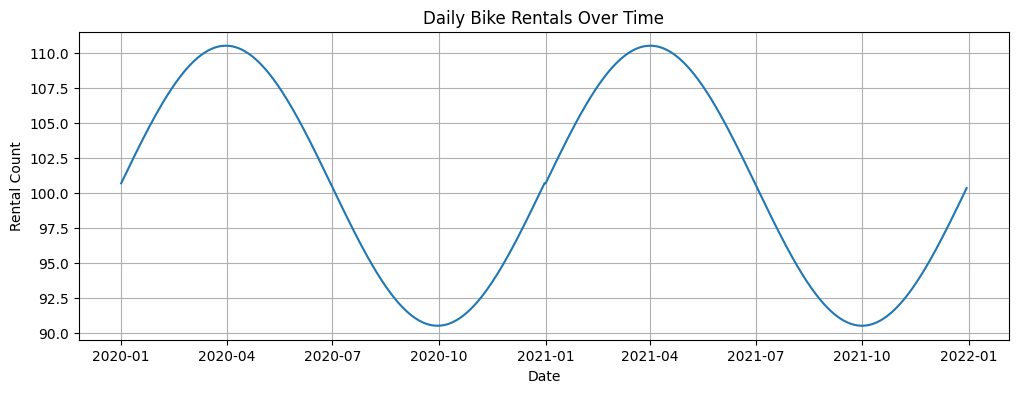

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load dataset (using a CSV or create mock time-series data)
# df = pd.read_csv("day.csv") # From UCI, if available
# For demo: simulate a time-series of bike rentals
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=730, freq='D') # 2 years
rentals = 100 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal()
df = pd.DataFrame({'date': dates, 'rentals': rentals})
# Set date as index
df.set_index('date', inplace=True)
# Visualize data
plt.figure(figsize=(12, 4))
plt.plot(df['rentals'])
plt.title("Daily Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller Test
result = adfuller(df['rentals'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -10.93971554007033
p-value: 9.362960488307391e-20


In [5]:
# Use last 30 days as test
train = df['rentals'][:-30]
test = df['rentals'][-30:]


In [8]:
from pmdarima import auto_arima
# Automatically choose best ARIMA(p,d,q) using AIC
model = auto_arima(train, seasonal=True, m=365, trace=True, suppress_warnings=True)
# Summary of chosen model
print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [9]:
# Forecast for the next 30 days
forecast = model.predict(n_periods=30)
# Plot forecast vs actual
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label="Actual")
plt.plot(test.index, forecast, label="Forecast", linestyle='--')
plt.title("Bike Rentals Forecast vs Actual (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'model' is not defined

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

NameError: name 'forecast' is not defined